In [1]:
import cv2
import os
import numpy as np
from keras import layers, models, optimizers
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
npy_dir='./npy_file/'
save_dir='./result'

In [3]:
with open(save_dir+"/model_json.json", 'r') as f:
    model = model_from_json(f.read())
    
model.load_weights(save_dir+"/model.h5")

print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
activation_6 (Activation)    (None, 149, 149, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
activation_7 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 35, 35, 64)        8256      
__________

In [4]:
IMG_SIZE = 150
image = cv2.imread("/Users/yusufsatilmis/Desktop/Dataset/bitirme/data/7/h_0_59.jpg")
x1, y1, x2, y2 = 201, 251, 440, 480
image = image[y1:y2, x1:x2]
image = cv2.resize(image,(IMG_SIZE,IMG_SIZE))

#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
test = np.array( image ).reshape(-1, IMG_SIZE, IMG_SIZE, 3).astype('float32') / 255.
pred = model.predict(test)
print "Tahmin edilen Sonuc ==> " +str(np.argmax(pred[0]))

Tahmin edilen Sonuc ==> 7


In [5]:
y_true = []
y_pred = []
dataset_folder="/Users/yusufsatilmis/Desktop/Dataset/bitirme/data/"
for filename in os.listdir(dataset_folder):
    #print filename
    if filename == '.DS_Store': #mac os file system otomatik kendisi icin olusturuyor.Bu yuzden kaldiriyoruz
        continue
    for imagename in os.listdir(dataset_folder+filename):
        if imagename == '.DS_Store':
            continue
        image = cv2.imread(dataset_folder+filename+"/"+imagename)
        x1, y1, x2, y2 = 201, 251, 440, 480
        image = image[y1:y2, x1:x2]
        #cv2.imshow("cropped", image)
        #cv2.waitKey(0)

        image = cv2.resize(image,(IMG_SIZE,IMG_SIZE))
        
        test = np.array( image ).reshape(-1, IMG_SIZE, IMG_SIZE, 3).astype('float32') / 255.
        pred = model.predict(test)
        
        y_true.append(filename)
        y_pred.append(str(np.argmax(pred[0])))


In [6]:
print (len(y_true))
print (len(y_pred))

2277
2277


In [7]:
print (y_true[0:10])
print (y_pred[0:10])

['9', '9', '9', '9', '9', '9', '9', '9', '9', '9']
['9', '9', '9', '9', '9', '9', '9', '9', '9', '9']


In [8]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



('matrix sum --> ', 2277)
Confusion matrix, without normalization


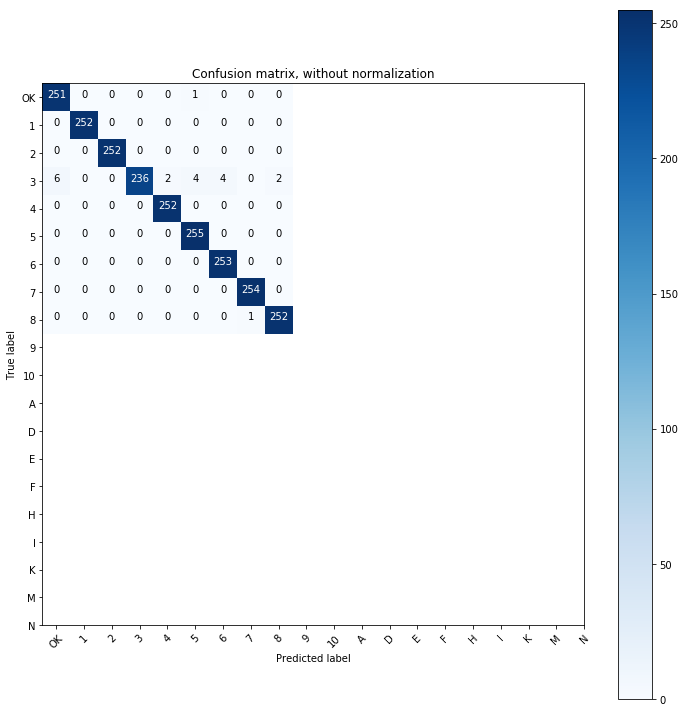

In [9]:
array=confusion_matrix(y_true, y_pred)
print ("matrix sum --> ",array.sum())

labels = ['OK','1','2','3','4','5','6','7','8','9','10','A','D','E','F','H','I','K','M','N']

plot_confusion_matrix(array, classes=labels, title='Confusion matrix, without normalization')